# Expanatory Data Anaysis On World Happiness Data

## The topics that we will take over in this project
* Bivariate data analysis
* Multivariate data analysis
* Techniques of how to visualize data sets with using Seaborn library (barplot, boxplot, kdeplot, heatmap, swarm, clustermap)
* Techniques of how to visualize data sets with using Plotly library (animated plot and worldmap)

## Introduction
* The World Happiness Report is a key global study that examines the overall well-being of nations
* As happiness metrics gain prominence, goverments, organizations and researchers increasingly utilize them to shape policies and improve societal well-being
* Experts from diverse fields- including economics, psychology, public policy, health and social science- contribute to understanding how well being indicators can effectively measure a country's progress
* The report not only evaluates global happiness trends but also explores the scientific foundations behind personal and national differences in life satisfaction.

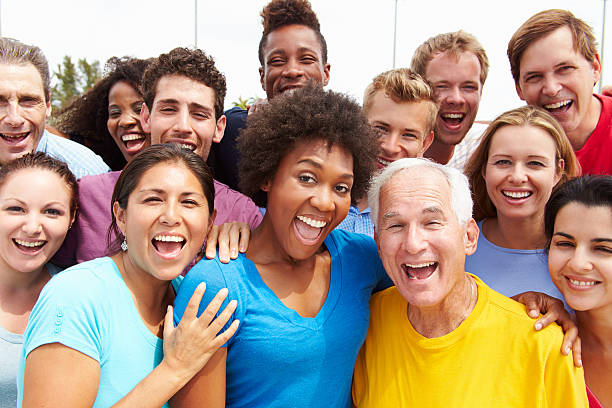

## Analysis Contents
1. [Python Libraries](#1)
1. [Data Contents](#2)
1. [Read and Analyse Data](#3)
1. [Data Distributions in 2024](#4)
1. [Happiest and Unhappiest Countries in 2024](#5)
1. [Ladder Score Distribution by Regional Indicator](#6)
1. [Ladder Score Distribution by Countries in Map View](#7)
1. [Most Generous and Ungenerous Countries in 2024](#8)
1. [Generosity Distribution by Countries in Map View](#9)
1. [Generosity Distribution by Regional Indicator in 2024](#10)
1. [Relationship Between Happiness and Income](#11)
1. [Relationship Between Happiness and Freedom](#12)
1. [Relationship Between Happiness and Corruption](#13)
1. [Relationship Between Features](#14)
1. [K-Means Clustering Analysis](#15)
1. [Regional Analysis](#16)

<a id = '1'><a/>
## Python Libraries
* In this section, we will add the necesarry libraries during this worh

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #helping at data visualization
import seaborn as sns #creating visual informations about data set

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


<ipython-input-1-ec73bc22fa91>:23: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<a id = '2'></a>
## Data Contents
* The happinnes scores and rankings use data from the Gallup World Poll.
    * Gallup World Poll: In 2005, Gallup started its World Poll, which continually survey citizens       in 160 countries, representing more than 98% of world's adult population. The Gallup World Poll      consists of more than 100 global questions as well as region-specific items
* The columns following the happiness score estimate the extent to which each of six factors - economic production, social support, life expectancy, freedom, corruption and generosity - contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world's lowest national averages for each of the six factors.
* **Ladder Score:** A metric that metricize the happiness of the people in a country. It is the national average response to the question of life evaluations
* **Logged GDP per Capita:** GDP per Capita is the sum of gross value added by all resident producers in the economy plus any product taxes (less subsidies) not included in the valuation of output, divided by mid-year population. The time series from 2023 to 2024 using country spesific forecast of real GDP growth in 2024
* **Social Support:** Social support refers to assistance or support provided by members of social networks to an individual.
* **Health Life Expectancy:** Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom of Making Choice:** Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* **Generosity:** It is a function of the national avarage of GWP responses to the question "Have you donated money to a charity in the past month?" on GDP per Capita
* **Ladder Score in Dystopia:** t has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

* World Happiness Report Offical Website: https://worldhappiness.report/

<a id = "3"></a>
## Read and Analyse Data

In [2]:
#read and show first five row of data
world_happiness = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding = "latin1")
df = world_happiness.copy()
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [3]:
#describe basic statistic in data set
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [4]:
#general information aboout data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [5]:
#detecting missing values at each columns
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [6]:
#deletion of missing values
df = df.dropna()
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [7]:
#read and show first five row of data
world_happiness2024 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv")
df2024 = world_happiness2024.copy()
df2024.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [8]:
#describe basic statistics about data set
df2024.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [9]:
#general information of data
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [10]:
#detecting missing values at each columns
df2024.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [11]:
#deletion of missing values
df2024 = df2024.dropna()
df2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB


<a id = 4></a>
## Data Distributions in 2024
* Unique Countries
* Count Regional Indicator
* Distributions of Other Features

In [12]:
#unique countries
df2024['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Croatia',
       'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica', 'Peru',
       'Dominican Republic', 'Mauritius', 'Moldova', 'Russia', 'Bolivia',
       'Ecua

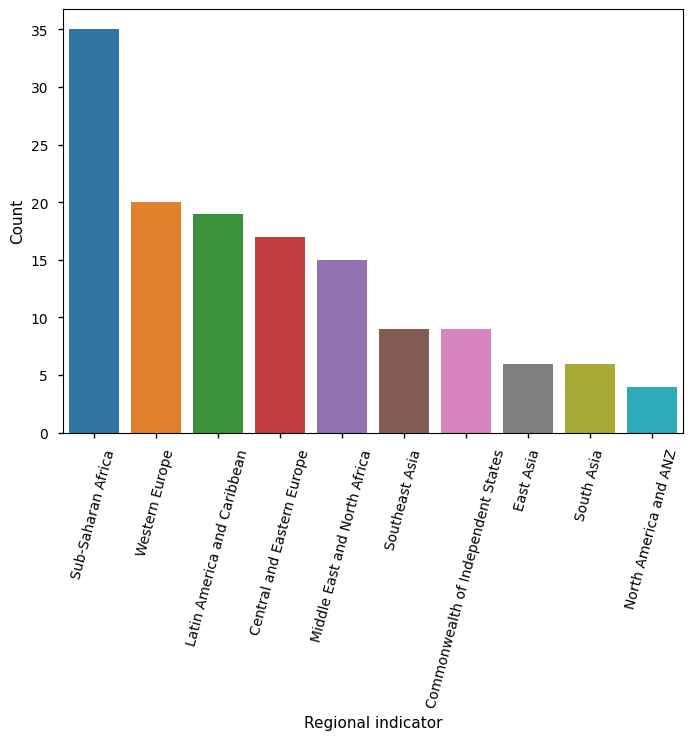

In [13]:
#count regional indicator
regional_counts = df2024["Regional indicator"].value_counts().reset_index()
regional_counts.columns = ["Regional indicator", "Count"]

sns.barplot(data = regional_counts, x = "Regional indicator", y = "Count")
plt.xticks(rotation = 75)
plt.show()

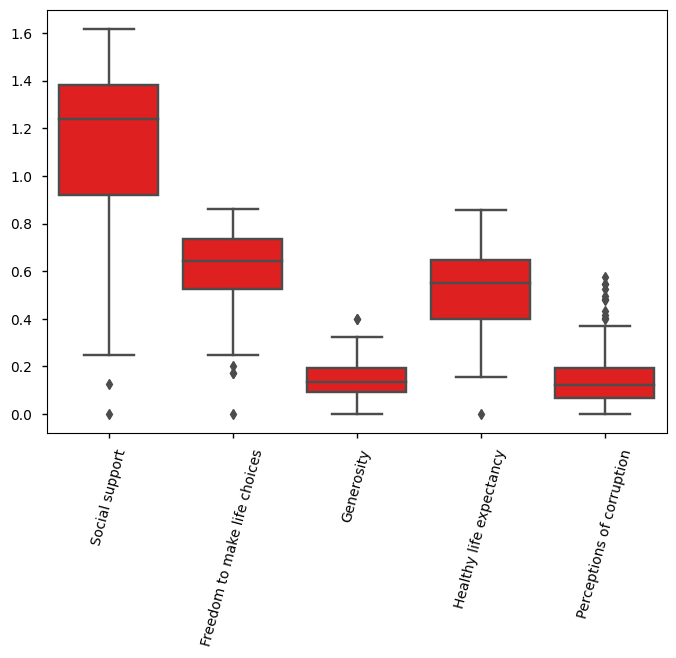

In [14]:
#distribution of feature set 1
list_features = ["Social support", "Freedom to make life choices", "Generosity", 
                 "Healthy life expectancy","Perceptions of corruption"]
sns.boxplot(data = df2024.loc[:, list_features], orient = "v", color = "red")
plt.xticks(rotation = 75)
plt.show()

<Axes: >

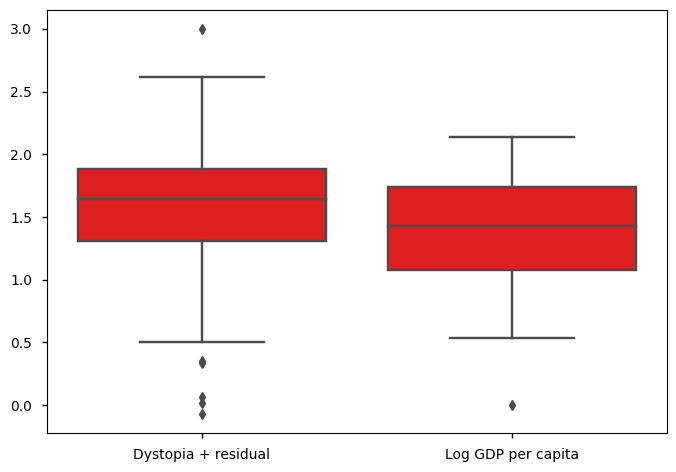

In [15]:
#distribution of feature set 2
list_features = ["Dystopia + residual", "Log GDP per capita"]
sns.boxplot(data = df2024.loc[:, list_features], orient = "v", color = "red")

<Axes: >

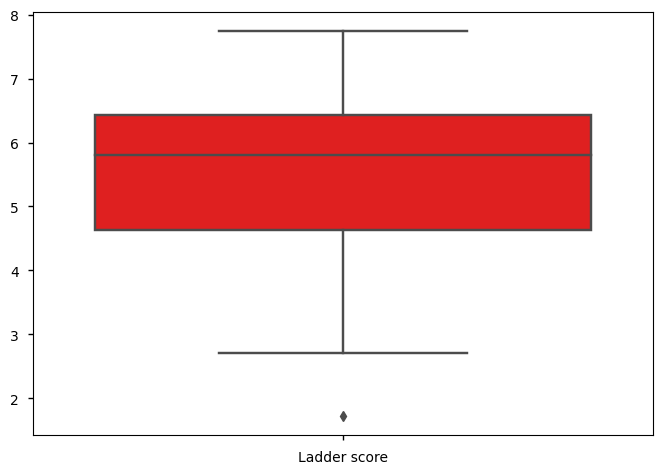

In [16]:
#distribution of feature set 3
list_feature = ["Ladder score"]
sns.boxplot(data = df2024.loc[:, list_feature], orient = "v", color = "red")

<a id = 5></a>
## Happiest and Unhappiest Countries in 2024

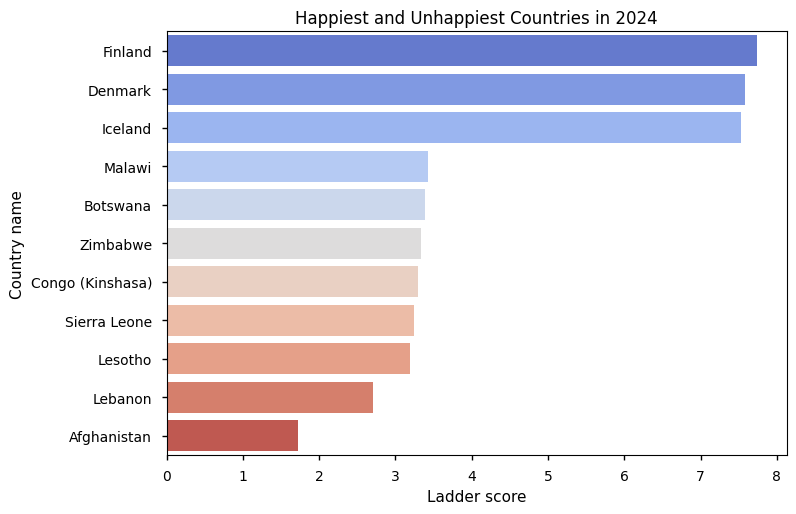

In [17]:
df2024_happiest_unhappiest = df2024[(df2024.loc[:, "Ladder score"] > 7.4) | (df2024.loc[:, "Ladder score"] < 3.5)]
sns.barplot(data = df2024_happiest_unhappiest, x = "Ladder score", y = "Country name", palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2024")
plt.show()

<a id = '6'></a>
## Ladder Score Distribution by Regional Indicator

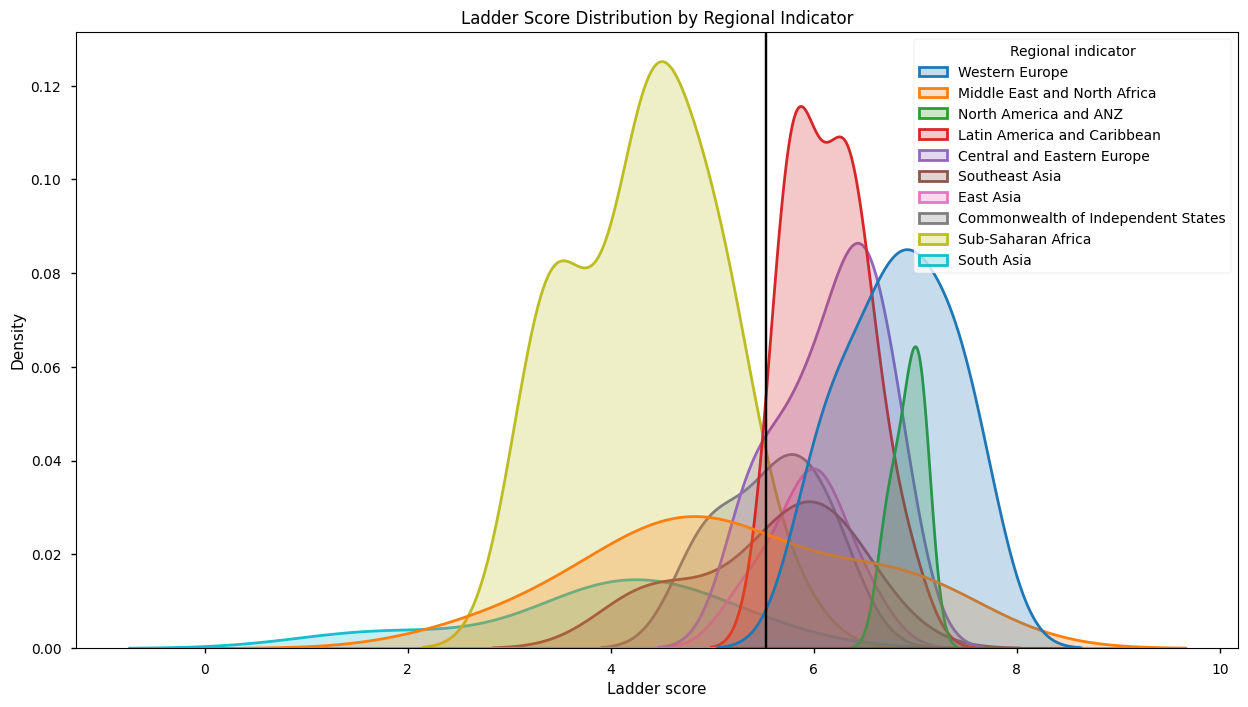

In [18]:
plt.figure(figsize = (15, 8))
sns.kdeplot(data = df2024, x = df2024["Ladder score"], hue = df2024["Regional indicator"], fill = True, linewidth = 2)
plt.title("Ladder Score Distribution by Regional Indicator")
plt.axvline(df2024["Ladder score"].mean(), c = "black")
plt.show()

<a id = '7'></a>
## Ladder Score Distribution by Countries in Map View

In [19]:
df.head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.35,0.451,50.5,0.718,0.164,0.882,0.414,0.258


In [20]:
fig = px.choropleth(df.sort_values("year"),
                   locations = "Country name",
                   color = "Life Ladder",
                   locationmode = "country names",
                   animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.write_html("interactive_plot1.html")

from IPython.display import IFrame
IFrame("interactive_plot1.html", width = 900, height = 600)

<a id = '8'></a>
## Most Generous and Ungenerous Countries in 2024

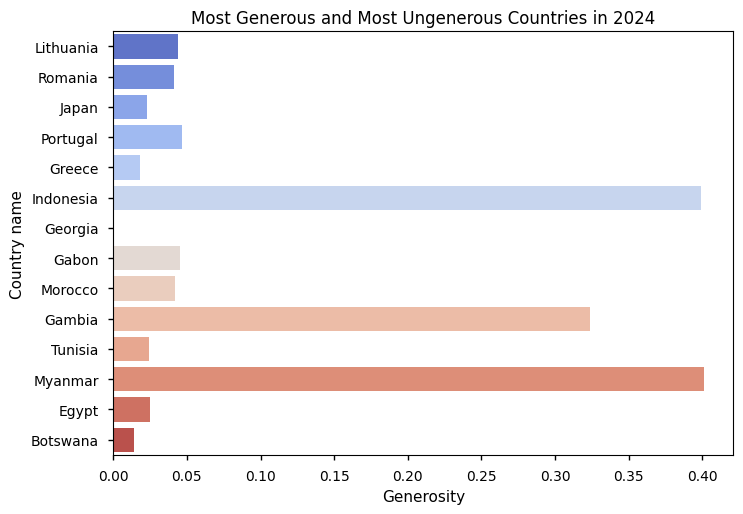

In [21]:
df2024_g = df2024[(df2024.loc[:, "Generosity"] > 0.3) | (df2024.loc[:, "Generosity"] < 0.05)]
sns.barplot(data = df2024_g, x = "Generosity", y = "Country name", palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2024")
plt.show()

<a id = '9'></a>
## Generosity Distribution by Countries in Map View

In [22]:
fig = px.choropleth(df.sort_values("year"),
                   locations = "Country name",
                   color = "Generosity",
                   locationmode = "country names",
                   animation_frame = "year")
fig.update_layout(title = "Generosity Comparison by Countries")
fig.write_html("interactive_plot2.html")
IFrame("interactive_plot2.html", width=900, height=600)

<a id = '10'></a>
## Generosity Distribution by Regional Indicator 2024

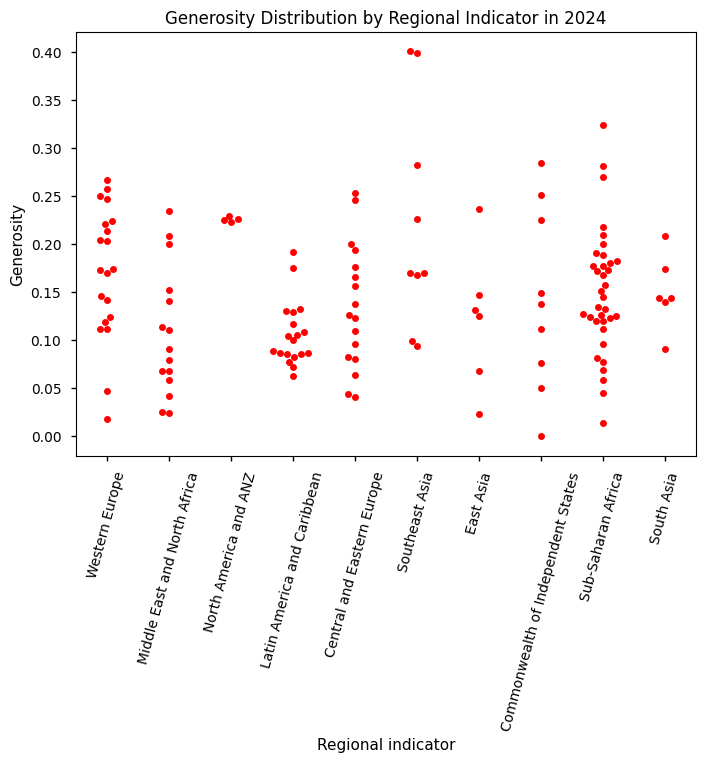

In [23]:
sns.swarmplot(data = df2024, x = "Regional indicator", y = "Generosity", color = "r")
plt.xticks(rotation = 75)
plt.title("Generosity Distribution by Regional Indicator in 2024")
plt.show()

<a id = "11"></a>
## Relationship Between Happiness and Income

In [24]:
pop = pd.read_csv("/kaggle/input/world-population-19602018/population_total_long.csv")
pop.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [25]:
df2024 = df2024.reset_index(drop=True)

country_continent = {}
for i in range(len(df2024)):
    country_continent[df2024.iloc[i]["Country name"]] = df2024.iloc[i]["Regional indicator"]


print(df["Country name"].value_counts().reset_index().columns)


all_countries = df["Country name"].value_counts().reset_index()["Country name"].tolist()
all_countries_2024 = df2024["Country name"].value_counts().reset_index()["Country name"].tolist()

for x in all_countries:
    if x not in all_countries_2024:
        print(x)

Index(['Country name', 'count'], dtype='object')
Türkiye
Belarus
Tajikistan
Haiti
Rwanda
Syria
Trinidad and Tobago
Central African Republic
Sudan
Burundi
Angola
Somalia
Bhutan
Djibouti
Bahrain
Belize
Suriname
Guyana
Qatar


In [26]:
df = world_happiness.copy()

In [27]:
region = []
for i in range(len(df)):
    if df["Country name"][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Bhutan':
        region.append("South Asia")
    elif df["Country name"][i] == 'Türkiye':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Belarus':
        region.append("Central and Eastern Europe")
    elif df["Country name"][i] == 'Tajikistan':
        region.append("South Asia")
    elif df["Country name"][i] == 'Haiti':
        region.append("Latin America and Caribbean")
    elif df["Country name"][i] == 'Rwanda':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Burundi':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df["Country name"][i] == 'Bahrain':
        region.append("Middle East and North Africa")
    elif df["Country name"][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent.get(df["Country name"][i], "Unknown"))

df["region"] = region


In [28]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,South Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,South Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,South Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,South Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,South Asia


In [29]:
all_countries = df["Country name"].value_counts().reset_index().iloc[:, 0].tolist()
all_countries_pop = pop["Country Name"].value_counts().reset_index().iloc[:, 0].tolist()

del_coun = []
for x in all_countries:
    if x not in all_countries_pop:
        del_coun.append(x)
del_coun

['Kyrgyzstan',
 'Egypt',
 'Russia',
 'Venezuela',
 'Türkiye',
 'South Korea',
 'Taiwan Province of China',
 'State of Palestine',
 'Iran',
 'Czechia',
 'Slovakia',
 'Yemen',
 'Congo (Brazzaville)',
 'Hong Kong S.A.R. of China',
 'Laos',
 'Ivory Coast',
 'Congo (Kinshasa)',
 'Syria',
 'Gambia',
 'Somaliland region']

In [30]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

In [31]:
pop_df = df[["Log GDP per capita", "Life Ladder", "Country name", "year", "Social support",
            "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity",
            "region", "Perceptions of corruption"]].copy()
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption
0,7.350,3.724,Afghanistan,2008,0.451,50.5,0.718,0.164,South Asia,0.882
1,7.509,4.402,Afghanistan,2009,0.552,50.8,0.679,0.187,South Asia,0.850
2,7.614,4.758,Afghanistan,2010,0.539,51.1,0.600,0.118,South Asia,0.707
3,7.581,3.832,Afghanistan,2011,0.521,51.4,0.496,0.160,South Asia,0.731
4,7.661,3.783,Afghanistan,2012,0.521,51.7,0.531,0.234,South Asia,0.776


In [32]:
pop_df = pop_df[~pop_df["Country name"].isin(del_coun)]
pop_df = pop_df[~pop_df.year.isin([2006, 2005, 2007, 2019, 2020, 2021, 2022, 2023])]
pop_dict = {x: {} for x in range(2008, 2021)}
for i in range(len(pop)):
    if(pop["Year"][i] in range(2008, 2018)):
        pop_dict[pop["Year"][i]][pop["Country Name"][i]] = pop["Count"][i]

In [33]:
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption
0,7.350,3.724,Afghanistan,2008,0.451,50.5,0.718,0.164,South Asia,0.882
1,7.509,4.402,Afghanistan,2009,0.552,50.8,0.679,0.187,South Asia,0.850
2,7.614,4.758,Afghanistan,2010,0.539,51.1,0.600,0.118,South Asia,0.707
3,7.581,3.832,Afghanistan,2011,0.521,51.4,0.496,0.160,South Asia,0.731
4,7.661,3.783,Afghanistan,2012,0.521,51.7,0.531,0.234,South Asia,0.776


In [34]:
fig = px.scatter(pop_df, x = "Log GDP per capita", y = "Life Ladder", animation_frame = "year",
                animation_group = "Country name", template = "plotly_white", color = "region",
                hover_name = "Country name", size_max = 60)
fig.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year")
fig.write_html("interactive_plot3.html")
IFrame("interactive_plot3.html", width=900, height=600)

<a id = '12'></a>
## Relationship Between Happiness and Freedom

In [35]:
fig = px.scatter(pop_df, x = "Freedom to make life choices", y = "Life Ladder", animation_frame = "year",
                animation_group = "Country name", template = "plotly_dark", color = "region",
                hover_name = "Country name", size_max = 60)
fig.update_layout(title = "Life Ladder and Freedom Comparison by countries via Regions for each Year")
fig.write_html("interactive_plot4.html")
IFrame("interactive_plot4.html", width=900, height=600)

<a id = '13'></a>
## Relationship Between Happiness and Corruption

In [36]:
fig = px.scatter(pop_df, x = "Perceptions of corruption", y = "Life Ladder", animation_frame = "year",
animation_group = "Country name", color = "region", hover_name = "Country name", 
size_max = 60)
fig.update_layout(title = "Life Ladder and Corruption Comparison by Countries via Regions for each Year")
fig.write_html("interactive_plot5.html")
IFrame("interactive_plot5.html", width=900, height=600)

<a id = '14'></a>
## Relationship Between Features

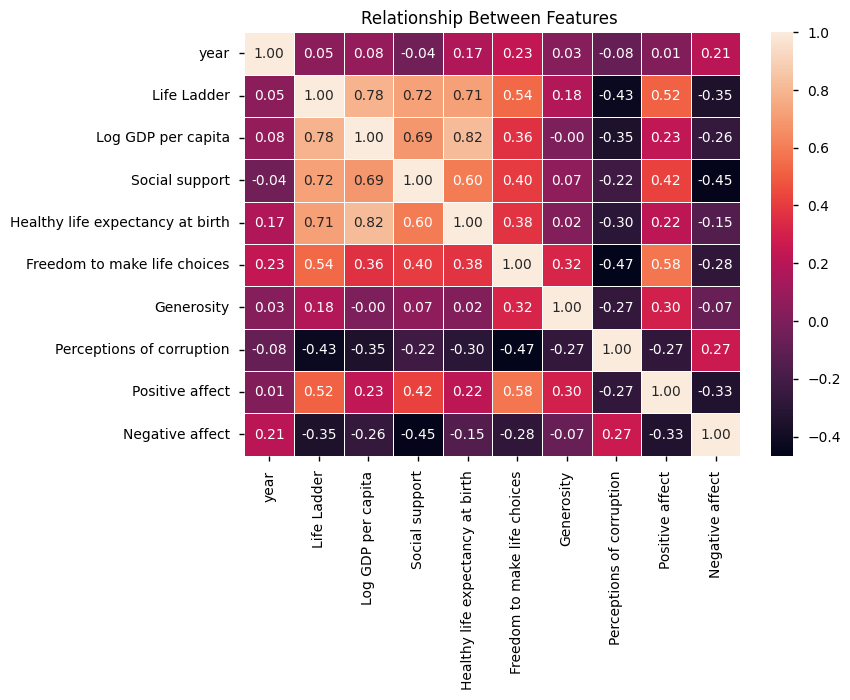

In [37]:
df_num = df.drop(columns = ["Country name", "region"])
sns.heatmap(df_num.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

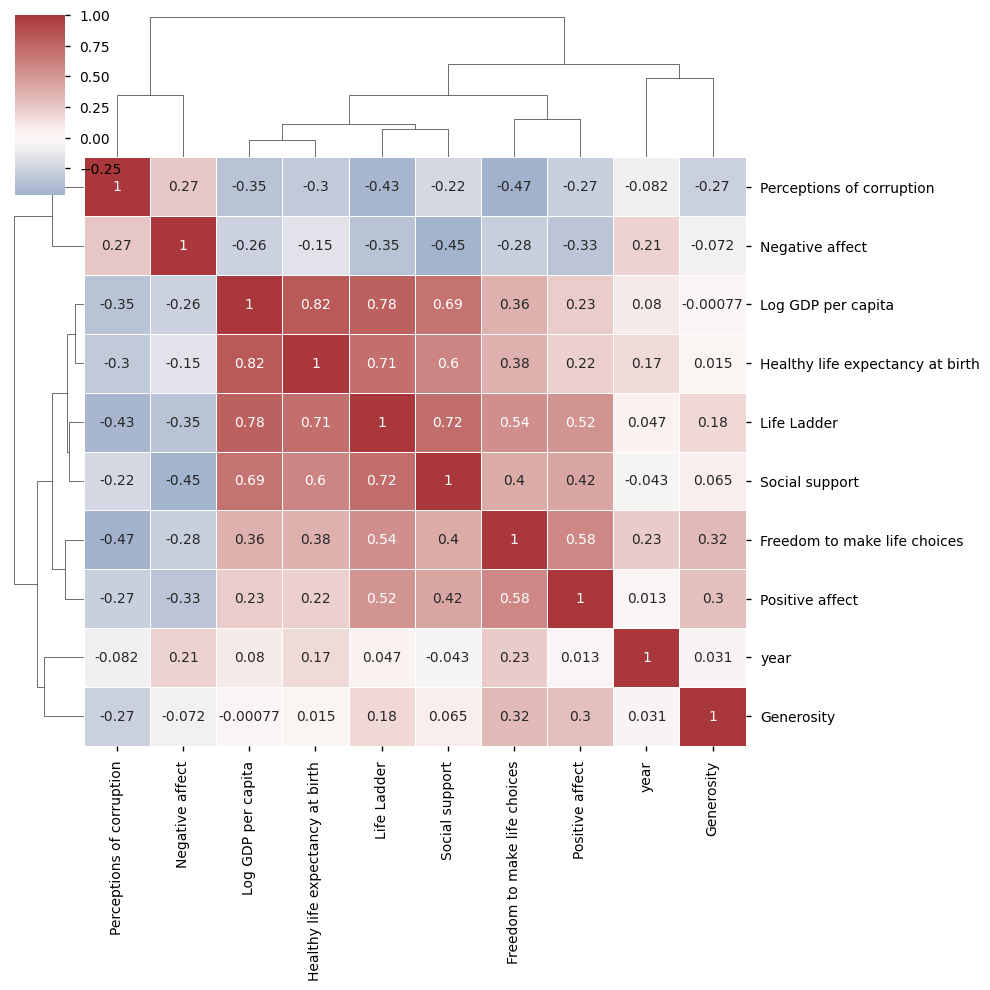

In [38]:
sns.clustermap(df_num.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize=(10,10))
plt.show()

<a id = '15'></a>
## K-Means Clustering Analysis

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']
df_k = df[features].dropna()

In [40]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_k)

In [41]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

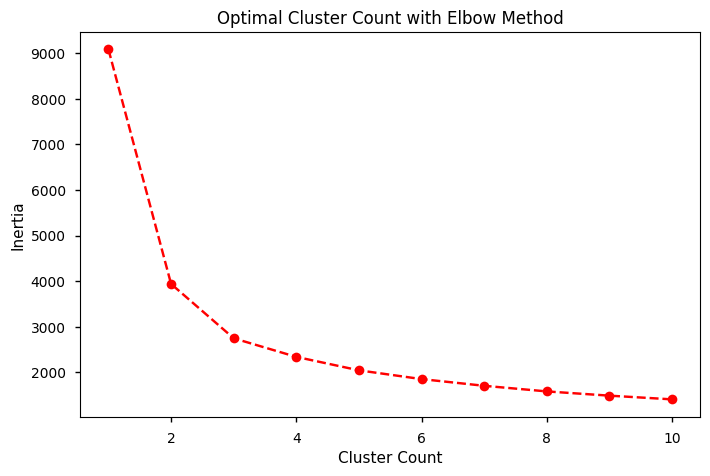

In [42]:
#Elbow Method Graphic
plt.figure(figsize = (8, 5))
plt.plot(k_values, inertia, marker = 'o', linestyle = '--', color = "r")
plt.xlabel("Cluster Count")
plt.ylabel("Inertia")
plt.title("Optimal Cluster Count with Elbow Method")
plt.show()

In [43]:
#Lets check K = 3
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
df_k["Cluster"] = kmeans.fit_predict(df_scaled)

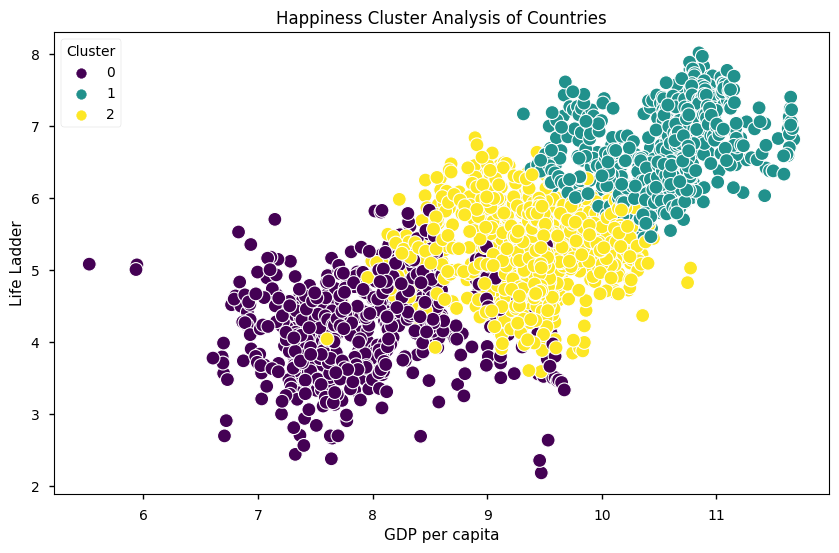

In [44]:
#Visualization of cluster results
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_k, x = 'Log GDP per capita', y = 'Life Ladder', hue = 'Cluster',
               palette = 'viridis', s = 100)
plt.xlabel("GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Happiness Cluster Analysis of Countries")
plt.legend(title = "Cluster")
plt.show()

In [45]:
cluster_means = df_k.groupby('Cluster').mean()
print(cluster_means)

         Life Ladder  Log GDP per capita  Social support  \
Cluster                                                    
0           4.275435            7.959066        0.672883   
1           6.693963           10.566228        0.908745   
2           5.294469            9.381969        0.821559   

         Healthy life expectancy at birth  
Cluster                                    
0                               54.939937  
1                               69.325819  
2                               64.324465  


<a id = '2'> 

<a id = '16'></a>
## Regional Comparison

In [46]:
df_reg = df[['region', 'Life Ladder']]
df_reg.head()

,region,Life Ladder
0,South Asia,3.724
1,South Asia,4.402
2,South Asia,4.758
3,South Asia,3.832
4,South Asia,3.783


<Figure size 1200x600 with 0 Axes>

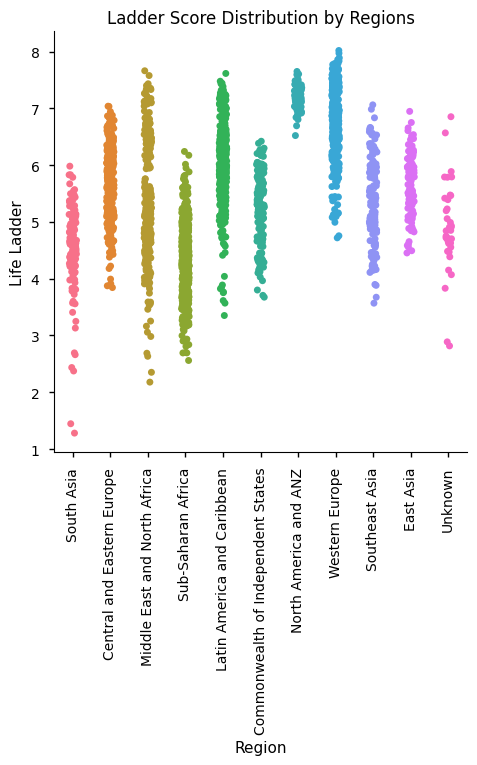

In [47]:
plt.figure(figsize = (12, 6))
sns.catplot(data = df_reg, x = 'region', y = 'Life Ladder', hue = 'region')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Life Ladder')
plt.title('Ladder Score Distribution by Regions')
plt.show()